In [ ]:
!pip install pytesseract

Extracted Text: ABSTRACT

This case study examines Starlink, SpaceX's low-Earth orbit (LEO) satellite internet service, and
its potential to bridge the digital divide by delivering high-speed intemet to remote and mural
areas around the globe. Traditional broadband infrastructure has long struggled to reach
Pe Coa St Me OMCs Morac tC MET Mm rte ese orcs MECN Ge gy
constellation of thousands of LEO satellites offers a transformative altemative—providing
low-latency, high-throughput intemet that rivals terrestrial solutions. The study explores
Starlink’s technical architecture, including phased-array antennas, inter-satellite laser links, and
Pe Nen eMC Us ae MCE ro Mac et Mere cene Mire ee
Peet Mn oe ec OPUS APG esd rll ise eer Rear norte ger Rec emer Cee coy
PS eC mee ace Myce iar Me occa UCC Co
Bieri Beto eile aC CSA ee Ce im areca oan ig it Core m
regulatory hurdles, environmental concems, and global scalability. In conclusion, Starlink is
Pet Cons incre ait at On Ur Taco lccsrde Ute

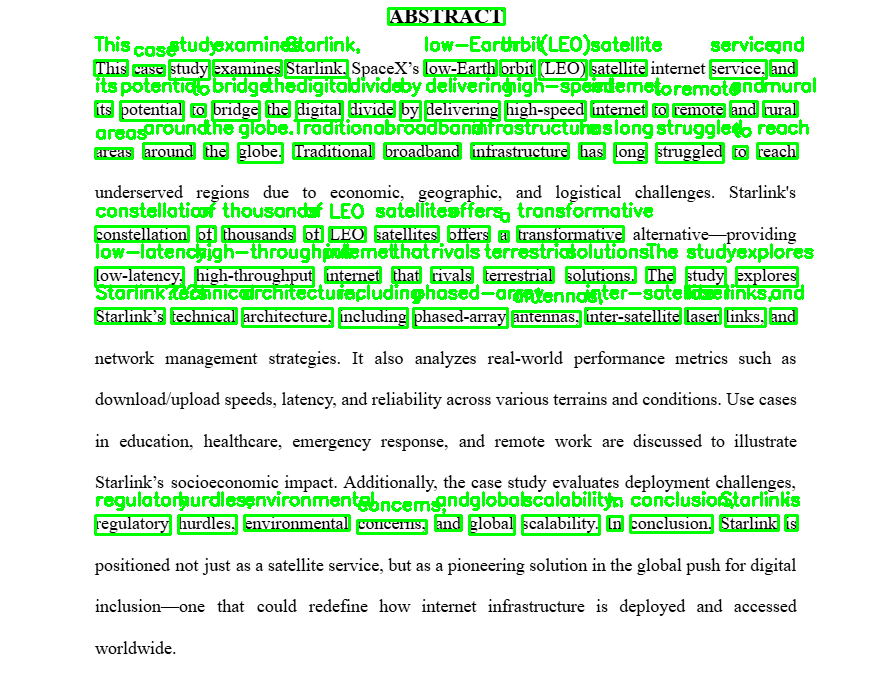

In [ ]:
import cv2    #
import numpy as np    #
import pytesseract    #
from pytesseract import Output    #
from google.colab.patches import cv2_imshow   #

# Upload image
image_path = "/content/text.png"

# Function to preprocess image
def preprocess_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)
    return thresh

# Function to extract text
def extract_text(img):
    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(img, config=custom_config)
    return text

# Function to extract bounding boxes
def extract_text_with_boxes(img):
    d = pytesseract.image_to_data(img, output_type=Output.DICT)
    boxes = []
    for i in range(len(d['level'])):
        if int(d['conf'][i]) > 60:
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            boxes.append((x, y, w, h, d['text'][i]))
    return boxes

# Main function for single image
def process_whiteboard_image(img_path):
    frame = cv2.imread(img_path)
    processed_img = preprocess_image(frame)

    text = extract_text(processed_img)
    print("Extracted Text:", text)

    boxes = extract_text_with_boxes(processed_img)
    for (x, y, w, h, txt) in boxes:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, txt, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    cv2_imshow(frame)  # Colab-friendly image display

# Run it
process_whiteboard_image(image_path)
